In [38]:
import pandas as pd

import os
cwd = os.getcwd()
print(cwd)

/Users/teerawatxu/Documents/jupyter/Senior Project


In [39]:
cities = []
points = []
with open(f'{cwd}/ant-colony-tsp-master/data/att48.txt') as f:
    for line in f.readlines():
        city = line.split(' ')
        cities.append(dict(index=int(city[0]), x=int(city[1]), y=int(city[2])))
        points.append((int(city[1]), int(city[2])))

In [40]:
print('cities')
print(cities)
print('points')
print(points)

cities
[{'index': 1, 'x': 6734, 'y': 1453}, {'index': 2, 'x': 2233, 'y': 10}, {'index': 3, 'x': 5530, 'y': 1424}, {'index': 4, 'x': 401, 'y': 841}, {'index': 5, 'x': 3082, 'y': 1644}, {'index': 6, 'x': 7608, 'y': 4458}, {'index': 7, 'x': 7573, 'y': 3716}, {'index': 8, 'x': 7265, 'y': 1268}, {'index': 9, 'x': 6898, 'y': 1885}, {'index': 10, 'x': 1112, 'y': 2049}, {'index': 11, 'x': 5468, 'y': 2606}, {'index': 12, 'x': 5989, 'y': 2873}, {'index': 13, 'x': 4706, 'y': 2674}, {'index': 14, 'x': 4612, 'y': 2035}, {'index': 15, 'x': 6347, 'y': 2683}, {'index': 16, 'x': 6107, 'y': 669}, {'index': 17, 'x': 7611, 'y': 5184}, {'index': 18, 'x': 7462, 'y': 3590}, {'index': 19, 'x': 7732, 'y': 4723}, {'index': 20, 'x': 5900, 'y': 3561}, {'index': 21, 'x': 4483, 'y': 3369}, {'index': 22, 'x': 6101, 'y': 1110}, {'index': 23, 'x': 5199, 'y': 2182}, {'index': 24, 'x': 1633, 'y': 2809}, {'index': 25, 'x': 4307, 'y': 2322}, {'index': 26, 'x': 675, 'y': 1006}, {'index': 27, 'x': 7555, 'y': 4819}, {'index'

In [41]:
x = []
y = []
for point in points:
    x.append(point[0])
    y.append(point[1])

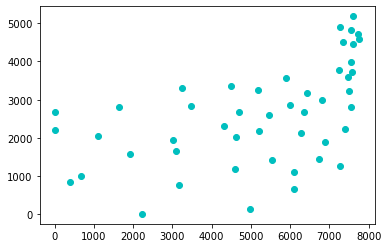

In [42]:
import matplotlib.pyplot as plt
import operator

plt.plot(x, y, 'co')

In [285]:
import math

### Distance
def distance(city1: dict, city2: dict):
    return math.sqrt((city1['x'] - city2['x']) ** 2 + (city1['y'] - city2['y']) ** 2)

cost_matrix = []
rank = len(cities)
for i in range(rank):
    row = []
    for j in range(rank):
        row.append(distance(cities[i], cities[j]))
    cost_matrix.append(row)

In [44]:
import numpy as np
allowed = [i for i in np.arange(rank)]

In [45]:
import random

### random 0 to 47
start = random.randint(0, rank - 1)
start

40

In [467]:
### Defualt values
cost_matrix = np.array(cost_matrix) # Distance between i & j
n = np.array([[0 if i == j else 1 / cost_matrix[i][j] for i in range(rank)] for j in range(rank)]) # 1/distance

ant = 48
t0 = np.array([[0 if i==j else 1 for i in range(rank)] for j in range(rank)]) # Default pheromone
alpha = 3
beta = 3
p = 0.2 # Pheromone evaporation


In [473]:
cost_matrix

array([[   0.        , 4726.65314996, 1204.34920185, ..., 1541.72922396,
        2378.53442271, 3743.0792137 ],
       [4726.65314996,    0.        , 3587.42316991, ..., 5460.74765943,
        4389.05547926, 2087.27669464],
       [1204.34920185, 3587.42316991,    0.        , ..., 2022.99036083,
        1866.16746301, 2559.95566368],
       ...,
       [1541.72922396, 5460.74765943, 2022.99036083, ...,    0.        ,
        1643.50509582, 3927.24547234],
       [2378.53442271, 4389.05547926, 1866.16746301, ..., 1643.50509582,
           0.        , 2531.02745935],
       [3743.0792137 , 2087.27669464, 2559.95566368, ..., 3927.24547234,
        2531.02745935,    0.        ]])

In [470]:
sorted(cost_matrix[4])

[0.0,
 303.78446306550967,
 893.0671867222533,
 1168.4096028362655,
 1251.3308914911356,
 1400.1103527936646,
 1579.1709850424684,
 1589.8402435465018,
 1668.9787296427717,
 1841.400825458705,
 1859.2541515349642,
 1923.090221492481,
 2011.1998906125666,
 2184.292333915037,
 2222.2569608395875,
 2425.5772508827667,
 2457.865740841025,
 2490.119073458135,
 2572.6328925830053,
 2650.963032560054,
 2798.672899786611,
 3065.8631737244896,
 3112.019440813312,
 3156.119452745729,
 3178.246371822046,
 3226.577443669995,
 3240.7110330913492,
 3408.2272518128834,
 3426.331274118135,
 3656.991249647721,
 3676.979330918247,
 3823.602620566107,
 3961.745322455748,
 4199.86487877884,
 4351.562937612186,
 4610.533374784311,
 4681.215760889472,
 4705.566278355879,
 4792.840076614282,
 4945.9341888059935,
 5034.307300910425,
 5140.422550724794,
 5312.083301304678,
 5329.472018877667,
 5485.28522503616,
 5532.702865688704,
 5576.983145034598,
 5748.342456743509]

In [471]:
sorted(cost_matrix[47])

[0.0,
 303.78446306550967,
 999.6449369651207,
 1168.151531266385,
 1195.9565209488178,
 1339.0504098053964,
 1380.9608973464817,
 1591.719196340862,
 1638.227395693284,
 1750.9314663915318,
 1835.296433822068,
 1913.9932079294326,
 2041.5506361587018,
 2087.276694643046,
 2189.19528594413,
 2527.6866894455097,
 2531.0274593532167,
 2533.5589592508004,
 2559.9556636785724,
 2663.953453046806,
 2843.780054786235,
 3012.48668046848,
 3101.116734339422,
 3108.684126764892,
 3188.4648343677873,
 3253.7290913657826,
 3301.2558216533293,
 3336.4030032356704,
 3405.5920190181323,
 3618.8078147367814,
 3743.0792136955906,
 3875.4192031314496,
 3927.2454723380865,
 4295.211287003237,
 4379.425190592939,
 4602.864868752938,
 4607.080854510804,
 4669.732861738453,
 4735.04223845997,
 4883.60276844872,
 4956.797857488239,
 5031.335508590139,
 5183.232389156404,
 5229.9599424852195,
 5368.067901955042,
 5431.070796813461,
 5468.879409897424,
 5617.856174734273]

In [ ]:
### Defualt parameters
cost_matrix = np.array(cost_matrix) # Distance between i & j
n = np.array([[0 if i == j else 1 / cost_matrix[i][j] for i in range(rank)] for j in range(rank)]) # 1/distance

ants = 1
t0 = np.array([[0 if i==j else 1 for i in range(rank)] for j in range(rank)]).astype(float) # Default pheromone
alpha = 3
beta = 3
p = .2 # Pheromone evaporation
gen = 1

### Denominator
tsa = [[t0[i][j]**alpha for i in range(rank)] for j in range(rank)] # t square alpha
nsb = [[n[i][j]**beta for i in range(rank)] for j in range(rank)] # n square beta
txn = [[tsa[i][j] * nsb[i][j] for i in range(rank)] for j in range(rank)] # tsa * nsb
denominator = sum(sum(np.array(txn))) # sum(np.array(txn) : Sum of fist row, # sum(sum(np.array(txn)) : Sum of all rows
# denominator



for ant in range(ants):
    allowed = [i for i in np.arange(rank)]
    paths = []

    ### Start
    start = random.randint(0, rank - 1) # Random between 0 to 47
    selected = start
    paths.append(selected)
    allowed.remove(selected)

    print(f'Start : {selected}')
    # print(f'Paths : {paths}')
    # print(f'Allowed {len(allowed)} :\n{allowed}')
    print(f'Best paths : {np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0]} ,Distance : {sorted(cost_matrix[paths[-1]])[1]}\n')

    ### Possibility of each round
    total_distance = 0
    for round in range(len(allowed)):
        prob = {}
        for i in allowed:
            # print(i)
            prob.update({i: (t0[paths[-1]][i]**alpha) * (n[paths[-1]][i]**beta) / denominator})

        max_prob = sorted(prob.values())[-1]
        selected = list(prob.keys())[list(prob.values()).index(max_prob)]

        paths.append(selected)
        allowed.remove(selected)

        print(f'Select : {selected}')
        # print(f'Paths : {paths}')
        # print(f'Allowed {len(allowed)} :\n{allowed}')
        # print(f'Best paths rount {round}: {np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0]} ,Distance : {sorted(cost_matrix[paths[-1]])[1]}')
        # print(np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0])
        
        print(f'{sorted(cost_matrix[paths[-1]])}\n')
        total_distance += sorted(cost_matrix[paths[-1]])[1]

    ### Update pheromone
    # for i in range(len(paths)):
    #     if i != (len(paths)-1):
    #         t0[paths[i]][paths[i+1]] = ((1-p)*t0[paths[i]][paths[i+1]]) + (1/total_distance)
    #         # print(t0[paths[i]][paths[i+1]])
    #     else:
    #         break

    # print(f'Ant {ant+1} : Total distance = {total_distance}')
    print(f'Path : {paths}\n')


Start : 13
Best paths : 24 ,Distance : 418.8006685763527

Select : 24
[0.0, 418.8006685763527, 532.0761223734814, 902.9197085012598, 966.632298239615, 1061.6896910114556, 1163.6051735876736, 1195.2309400279094, 1283.3471860724205, 1339.0504098053964, 1400.1103527936646, 1447.1119514398324, 1517.2781551185662, 1769.950564281387, 1931.128167678158, 1972.882409065477, 2018.1105024254741, 2071.6951995889744, 2165.0357964708114, 2283.497755637172, 2284.9087509132614, 2443.8512638865727, 2506.768836570297, 2577.884791840008, 2588.4823739017424, 2627.5939564552205, 2717.9854672164824, 3085.985904050762, 3105.933032117724, 3140.1719698131183, 3206.6421689985928, 3273.237693782717, 3282.122788684177, 3330.7195919200403, 3400.271900892633, 3551.055054487328, 3634.6990246786595, 3747.249791513771, 3863.0661397392614, 3931.805819213355, 3934.419652248601, 4096.890650237079, 4135.644327066823, 4177.3432944875385, 4182.7533993770185, 4285.311190567145, 4311.557143306813, 4371.208071002798]

Select :

In [47]:
### Denominator
tsa = [[t0[i][j]**alpha for i in range(rank)] for j in range(rank)] # t square alpha
nsb = [[n[i][j]**beta for i in range(rank)] for j in range(rank)] # n square beta
txn = [[tsa[i][j] * nsb[i][j] for i in range(rank)] for j in range(rank)] # tsa * nsb

# sum(np.array(txn) : Sum of fist row
# sum(sum(np.array(txn)) : Sum of all rows
denominator = sum(sum(np.array(txn)))
denominator

3.732969235388435e-06

In [48]:
allowed = [i for i in np.arange(rank)]
path = []

### Start
start = random.randint(0, rank - 1) # Random between 0 to 47
selected = start
path.append(selected)
allowed.remove(selected)

print(f'Start : {selected}')
print(f'Path : {path}')
print(f'Allowed {len(allowed)} :\n{allowed}')
print(f'Best path : {np.where(cost_matrix[path[-1]] == sorted(cost_matrix[path[-1]])[1])[0][0]} ,Distance : {sorted(cost_matrix[path[-1]])[1]}')

Start : 23
Path : [23]
Allowed 47 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Best path : 9 ,Distance : 921.4342081776647


In [49]:
# Prob รอบที่ 1
prob = {}
for i in allowed:
    # print(i)
    prob.update({i: (t0[path[-1]][i]**alpha) * (n[path[-1]][i]**beta) / denominator})
    
    ### Update pheromone
    # t0 = ((1-p)*t0[path[-1]]) + sum....
    t0[path[-1]][i] += ((1-p)*t0[path[-1]][i]) + (1/sorted(cost_matrix[path[-1]])[1])
    print(f'Round {i} : {t0[path[-1]][i]}')

max_prob = sorted(prob.values())[-1]
selected = list(prob.keys())[list(prob.values()).index(max_prob)]
path.append(selected)
allowed.remove(selected)
# print(f'Select : {selected}')
# print(f'Path : {path}')
# print(f'Allowed {len(allowed)} :\n{allowed}')
print(f'Best path : {np.where(cost_matrix[path[-1]] == sorted(cost_matrix[path[-1]])[1])[0][0]} ,Distance : {sorted(cost_matrix[path[-1]])[1]}')

# prob
# t0[path[-1]][i] = ((1-p)*t0[path[-1]][i]) + (1/sorted(cost_matrix[path[-1]])[1])

Round 0 : 1
Round 1 : 1
Round 2 : 1
Round 3 : 1
Round 4 : 1
Round 5 : 1
Round 6 : 1
Round 7 : 1
Round 8 : 1
Round 9 : 1
Round 10 : 1
Round 11 : 1
Round 12 : 1
Round 13 : 1
Round 14 : 1
Round 15 : 1
Round 16 : 1
Round 17 : 1
Round 18 : 1
Round 19 : 1
Round 20 : 1
Round 21 : 1
Round 22 : 1
Round 24 : 1
Round 25 : 1
Round 26 : 1
Round 27 : 1
Round 28 : 1
Round 29 : 1
Round 30 : 1
Round 31 : 1
Round 32 : 1
Round 33 : 1
Round 34 : 1
Round 35 : 1
Round 36 : 1
Round 37 : 1
Round 38 : 1
Round 39 : 1
Round 40 : 1
Round 41 : 1
Round 42 : 1
Round 43 : 1
Round 44 : 1
Round 45 : 1
Round 46 : 1
Round 47 : 1
Best path : 23 ,Distance : 921.4342081776647


In [50]:
t0[0]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [51]:
max_prob = sorted(prob.values())[-1]
selected = list(prob.values()).index(max_prob)
selected

9

In [52]:
# Pheromone ที่เกิดจากการเดินผ่านของมด รอบที่ 1
t0[start][selected]

1

In [53]:
# Shortest path รอบที่ 1
shortest_path = sorted(cost_matrix[start])[1]
shortest_path

921.4342081776647

In [54]:
# tk : ระยะทางทั้งหมดที่มด k ตัวเดินผ่าน
# tk = sum(1/lk) # lk : ระยะทางที่มด kth เดินผ่าน

In [ ]:
# Update pheromone
t_new = ((1-p)*t0[start][select]) + (1/shortest_path)
t_new

# New

In [435]:
### Defualt parameters
cost_matrix = np.array(cost_matrix) # Distance between i & j
n = np.array([[0 if i == j else 1 / cost_matrix[i][j] for i in range(rank)] for j in range(rank)]) # 1/distance

ants = 1
t0 = np.array([[0 if i==j else 1 for i in range(rank)] for j in range(rank)]).astype(float) # Default pheromone
alpha = 3
beta = 3
p = .2 # Pheromone evaporation
gen = 1

### Denominator
tsa = [[t0[i][j]**alpha for i in range(rank)] for j in range(rank)] # t square alpha
nsb = [[n[i][j]**beta for i in range(rank)] for j in range(rank)] # n square beta
txn = [[tsa[i][j] * nsb[i][j] for i in range(rank)] for j in range(rank)] # tsa * nsb
denominator = sum(sum(np.array(txn))) # sum(np.array(txn) : Sum of fist row, # sum(sum(np.array(txn)) : Sum of all rows
# denominator



for ant in range(ants):
    allowed = [i for i in np.arange(rank)]
    paths = []

    ### Start
    start = random.randint(0, rank - 1) # Random between 0 to 47
    selected = start
    paths.append(selected)
    allowed.remove(selected)

    print(f'Start : {selected}')
    # print(f'Paths : {paths}')
    # print(f'Allowed {len(allowed)} :\n{allowed}')
    print(f'Best paths : {np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0]} ,Distance : {sorted(cost_matrix[paths[-1]])[1]}\n')

    ### Possibility of each round
    total_distance = 0
    for round in range(len(allowed)):
        prob = {}
        for i in allowed:
            # print(i)
            prob.update({i: (t0[paths[-1]][i]**alpha) * (n[paths[-1]][i]**beta) / denominator})

        max_prob = sorted(prob.values())[-1]
        selected = list(prob.keys())[list(prob.values()).index(max_prob)]

        paths.append(selected)
        allowed.remove(selected)

        print(f'Select : {selected}')
        # print(f'Paths : {paths}')
        # print(f'Allowed {len(allowed)} :\n{allowed}')
        # print(f'Best paths rount {round}: {np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0]} ,Distance : {sorted(cost_matrix[paths[-1]])[1]}')
        # print(np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0])
        
        print(f'{sorted(cost_matrix[paths[-1]])}\n')
        total_distance += sorted(cost_matrix[paths[-1]])[1]

    ### Update pheromone
    # for i in range(len(paths)):
    #     if i != (len(paths)-1):
    #         t0[paths[i]][paths[i+1]] = ((1-p)*t0[paths[i]][paths[i+1]]) + (1/total_distance)
    #         # print(t0[paths[i]][paths[i+1]])
    #     else:
    #         break

    # print(f'Ant {ant+1} : Total distance = {total_distance}')
    print(f'Path : {paths}\n')


Start : 13
Best paths : 24 ,Distance : 418.8006685763527

Select : 24
[0.0, 418.8006685763527, 532.0761223734814, 902.9197085012598, 966.632298239615, 1061.6896910114556, 1163.6051735876736, 1195.2309400279094, 1283.3471860724205, 1339.0504098053964, 1400.1103527936646, 1447.1119514398324, 1517.2781551185662, 1769.950564281387, 1931.128167678158, 1972.882409065477, 2018.1105024254741, 2071.6951995889744, 2165.0357964708114, 2283.497755637172, 2284.9087509132614, 2443.8512638865727, 2506.768836570297, 2577.884791840008, 2588.4823739017424, 2627.5939564552205, 2717.9854672164824, 3085.985904050762, 3105.933032117724, 3140.1719698131183, 3206.6421689985928, 3273.237693782717, 3282.122788684177, 3330.7195919200403, 3400.271900892633, 3551.055054487328, 3634.6990246786595, 3747.249791513771, 3863.0661397392614, 3931.805819213355, 3934.419652248601, 4096.890650237079, 4135.644327066823, 4177.3432944875385, 4182.7533993770185, 4285.311190567145, 4311.557143306813, 4371.208071002798]

Select :

# 1

In [465]:
### Defualt parameters
cost_matrix = np.array(cost_matrix) # Distance between i & j
n = np.array([[0 if i == j else 1 / cost_matrix[i][j] for i in range(rank)] for j in range(rank)]) # 1/distance

ants = 48
t0 = np.array([[0 if i==j else 1 for i in range(rank)] for j in range(rank)]).astype(float) # Default pheromone
alpha = 3
beta = 3
p = .2 # Pheromone evaporation
gen = 1

### Denominator
tsa = [[t0[i][j]**alpha for i in range(rank)] for j in range(rank)] # t square alpha
nsb = [[n[i][j]**beta for i in range(rank)] for j in range(rank)] # n square beta
txn = [[tsa[i][j] * nsb[i][j] for i in range(rank)] for j in range(rank)] # tsa * nsb
denominator = sum(sum(np.array(txn))) # sum(np.array(txn) : Sum of fist row, # sum(sum(np.array(txn)) : Sum of all rows
# denominator

In [ ]:
allowed = [i for i in np.arange(rank)]
paths = []


### Start
start = random.randint(0, rank - 1) # Random between 0 to 47
selected = start

paths.append(selected)
allowed.remove(selected)

print(f'Round : 1')
print(f'Start : {selected}')
best_path = np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0] # Return array
distance_ij = sorted(cost_matrix[paths[-1]])[1] # index[0] : 0
print(f'Best paths : {best_path} ,Distance : {distance_ij}')
# for best in enumerate(cost_matrix[paths[-1]]):
#     print(best)


for round in range(len(allowed)):
    # print(f'Round : {round+2}')

    ### Probability
    prob = {}
    for i in allowed:
        prob.update({i: (t0[paths[-1]][i]**alpha) * (n[paths[-1]][i]**beta) / denominator})
    max_prob = sorted(prob.values())[-1]
    selected = list(prob.keys())[list(prob.values()).index(max_prob)]

    paths.append(selected)
    allowed.remove(selected)

    print(f'Select : {selected}')
    best_path = np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0] # Return array
    distance_ij = sorted(cost_matrix[paths[-1]])[1] # index[0] : 0
    print(f'Best paths : {best_path} ,Distance : {distance_ij}')
    # for best in enumerate(cost_matrix[paths[-1]]):
    #     print(best)

print(f'Paths : {paths}')

### Total distance
total_distance = 0
for i in range(len(paths)):
    if i != len(paths)-1:
        total_distance += (cost_matrix[paths[i]][paths[i+1]])

print(total_distance)

### Update pheromone
for i in range(len(paths)):
    if i != len(paths)-1:
        t_new = ((1-p)*t0[paths[i]][paths[i+1]]) + (1/total_distance)
        t0[paths[i]][paths[i+1]] = t_new
        # print(paths[i], paths[i+1])
        # print(t0[paths[i]][paths[i+1]])

# 2

In [ ]:
### Defualt parameters
cost_matrix = np.array(cost_matrix) # Distance between i & j
n = np.array([[0 if i == j else 1 / cost_matrix[i][j] for i in range(rank)] for j in range(rank)]) # 1/distance

ants = 48
t0 = np.array([[0 if i==j else 1 for i in range(rank)] for j in range(rank)]).astype(float) # Default pheromone
alpha = 3
beta = 3
p = .2 # Pheromone evaporation
gen = 1

### Denominator
tsa = [[t0[i][j]**alpha for i in range(rank)] for j in range(rank)] # t square alpha
nsb = [[n[i][j]**beta for i in range(rank)] for j in range(rank)] # n square beta
txn = [[tsa[i][j] * nsb[i][j] for i in range(rank)] for j in range(rank)] # tsa * nsb
denominator = sum(sum(np.array(txn))) # sum(np.array(txn) : Sum of fist row, # sum(sum(np.array(txn)) : Sum of all rows
# denominator

"""--------------------------------------------------"""
allowed = [i for i in np.arange(rank)]
paths = []

### Start
start = random.randint(0, rank - 1) # Random between 0 to 47
selected = start

paths.append(selected)
allowed.remove(selected)

print(f'Round : 1')
print(f'Start : {selected}')
best_path = np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0] # Return array
distance_ij = sorted(cost_matrix[paths[-1]])[1] # index[0] : 0
print(f'Best paths : {best_path} ,Distance : {distance_ij}')
# for best in enumerate(cost_matrix[paths[-1]]):
#     print(best)


for round in range(len(allowed)):
    # print(f'Round : {round+2}')

    ### Probability
    prob = {}
    for i in allowed:
        prob.update({i: (t0[paths[-1]][i]**alpha) * (n[paths[-1]][i]**beta) / denominator})
    max_prob = sorted(prob.values())[-1]
    selected = list(prob.keys())[list(prob.values()).index(max_prob)]

    paths.append(selected)
    allowed.remove(selected)

    print(f'Select : {selected}')
    best_path = np.where(cost_matrix[paths[-1]] == sorted(cost_matrix[paths[-1]])[1])[0][0] # Return array
    distance_ij = sorted(cost_matrix[paths[-1]])[1] # index[0] : 0
    print(f'Best paths : {best_path} ,Distance : {distance_ij}')
    # for best in enumerate(cost_matrix[paths[-1]]):
    #     print(best)

print(f'Paths : {paths}')

### Total distance
total_distance = 0
for i in range(len(paths)):
    if i != len(paths)-1:
        total_distance += (cost_matrix[paths[i]][paths[i+1]])

print(total_distance)

### Update pheromone
for i in range(len(paths)):
    if i != len(paths)-1:
        t_new = ((1-p)*t0[paths[i]][paths[i+1]]) + (1/total_distance)
        t0[paths[i]][paths[i+1]] = t_new
        # print(paths[i], paths[i+1])
        # print(t0[paths[i]][paths[i+1]])